In [3]:
import h5py
import numpy as np
import matplotlib.pyplot as plt 
import math
DATA_NAME = 'lms_fun_v3.hdf5'

# extracting all data
with h5py.File(DATA_NAME, 'r') as hf:
    print(list(hf.keys()))
    matched_10_v = hf['matched_10_v'][:]
    matched_10_x = hf['matched_10_x'][:]
    matched_10_y = hf['matched_10_y'][:]
    matched_10_z = hf['matched_10_z'][:]
    matched_3_v = hf['matched_3_v'][:]
    matched_3_x = hf['matched_3_x'][:]
    matched_3_y = hf['matched_3_y'][:]
    matched_3_z = hf['matched_3_z'][:]
    mismatched_v = hf['mismatched_v'][:]
    mismatched_x = hf['mismatched_x'][:]
    mismatched_y = hf['mismatched_y'][:]
    timevarying_coefficents = hf['timevarying_coefficents'][:]
    timevarying_v = hf['timevarying_v'][:]
    timevarying_x = hf['timevarying_x'][:]
    timevarying_y = hf['timevarying_y'][:]
    timevarying_z = hf['timevarying_z'][:]
print(matched_10_z.shape)
print(matched_10_v.shape)
print(mismatched_v.shape)
print(mismatched_x.shape)
print(mismatched_y.shape)
print(timevarying_v.shape)
print(timevarying_coefficents.shape)
print(timevarying_z.shape)
print(matched_10_v[0][0])

['matched_10_v', 'matched_10_x', 'matched_10_y', 'matched_10_z', 'matched_3_v', 'matched_3_x', 'matched_3_y', 'matched_3_z', 'mismatched_v', 'mismatched_x', 'mismatched_y', 'timevarying_coefficents', 'timevarying_v', 'timevarying_x', 'timevarying_y', 'timevarying_z']
(600, 501)
(600, 501, 3)
(600, 501, 3)
(600, 501)
(600, 501)
(501, 3)
(501, 3)
(501,)
[-0.37752433  0.          0.        ]


In [31]:
# def LMS(step,w,vn,zn,times=1):
#     MSE=[]
#     for number in range(times):
#         for i in range(len(vn)): 
#             result=[]
#             for j in range(len(vn[i])):
#                 result.append((zn[i][j]-w.T@vn[i][j])**2)
#                 w=np.add(w,step*(zn[i][j]-w.T@vn[i][j])*vn[i][j])
#             MSE.append(result)
#     return w,MSE
def sum_result(list):
    result=0
    for i in range(len(list)):
        result+=list[i]
    return result/len(list)
def LMS(step,w,vn,zn,times=1):
    MSE2=[]
    for number in range(times):
        MSE=[]
        for i in range(len(vn)): #600
            result=[]
            for j in range(len(vn[i])):#501
                result.append((zn[i][j]-w[i][j].T@vn[i][j])**2)#samples error
                w[i][j]=np.add(w[i][j],step*(zn[i][j]-w[i][j].T@vn[i][j])*vn[i][j])
            MSE.append(sum_result(result))#sequence error
        MSE2.append(10*math.log10(sum_result(MSE)))#averaged sequence error  dB=10*lg 
        print("MSE= %f"%(10*math.log10(sum_result(MSE)))+" Times=%d"%number)
    return w,MSE2

In [32]:
step = 0.05
step2 = 0.15
# w = np.array([.0,.0,.0])

In [33]:
w=np.zeros((600,501,3))
a,MSE=LMS(step,w,matched_10_v,matched_10_z,times=1)
# sum1=[]
# for i in range(len(MSE)):
#     result=0
#     for j in range(len(MSE[0])):
#         result+=MSE[i][j]
#     sum1.append(result/len(MSE[0]))
print(MSE)
print(a)

MSE= 1.495455 Times=0
[1.4954553661347203]
[[[ 4.42438843e-03  0.00000000e+00  0.00000000e+00]
  [-1.38851546e-03  4.87768931e-03  0.00000000e+00]
  [ 9.70265978e-04  1.28607416e-03 -4.51782525e-03]
  ...
  [ 2.64824253e-01 -6.93827128e-02 -2.43438420e-01]
  [ 4.22653185e-02  1.85600721e-01 -4.86265187e-02]
  [-7.82202824e-03  1.34361541e-02  5.90025102e-02]]

 [[ 1.12063587e-03  0.00000000e+00  0.00000000e+00]
  [-4.64532895e-03  8.62728566e-03  0.00000000e+00]
  [ 3.34055437e-01  1.84721462e-02 -3.43063933e-02]
  ...
  [ 1.18342502e-02  1.67933825e-02  8.11064215e-03]
  [ 3.45336644e-02  1.35194779e-02  1.91848034e-02]
  [ 2.43877158e-02 -1.73742150e-02 -6.80177792e-03]]

 [[ 1.12981862e-03  0.00000000e+00  0.00000000e+00]
  [ 1.04397330e-02  1.77252006e-03  0.00000000e+00]
  [ 5.35359814e-02 -3.15999874e-02 -5.36523409e-03]
  ...
  [ 8.33820574e-02  1.62011494e-02  1.15361021e-01]
  [ 7.44574636e-03 -9.90660376e-03 -1.92485497e-03]
  [ 4.69345606e-02  3.28116023e-02 -4.36560054e-02]

(600, 501, 3)


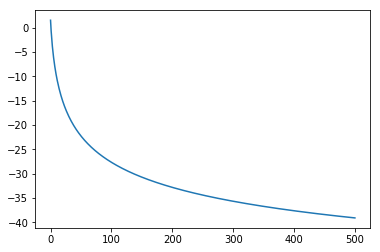

In [53]:
import matplotlib.pyplot as plt 
import math
print(a.shape)
plt.plot(MSE)
plt.show()

In [5]:
# import matplotlib.pyplot as plt 
# plt.plot(sum)
# plt.show()
# print(len(MSE))

In [6]:
a2,MSE2=LMS(step2,w,matched_10_v,matched_10_z)
sum2=[]
for i in range(len(MSE2)):
    result=0
    for j in range(len(MSE2[0])):
        result+=MSE2[i][j]
    sum2.append(result/len(MSE2[0]))
print(len(sum2))
print(a2)

600
[1.16741778 0.42239881 0.41416126]


In [7]:
a3,MSE3=LMS(step,w,matched_3_v,matched_3_z)
sum3=[]
for i in range(len(MSE3)):
    result=0
    for j in range(len(MSE3[0])):
        result+=MSE3[i][j]
    sum3.append(result/len(MSE3[0]))
print(len(sum3))
print(a3)

600
[0.97895879 0.45415042 0.22424694]


In [8]:
a4,MSE4=LMS(step2,w,matched_3_v,matched_3_z)
sum4=[]
for i in range(len(MSE4)):
    result=0
    for j in range(len(MSE4[0])):
        result+=MSE4[i][j]
    sum4.append(result/len(MSE4[0]))
print(len(sum4))
print(a4)

600
[0.60023267 0.85637593 0.26200161]


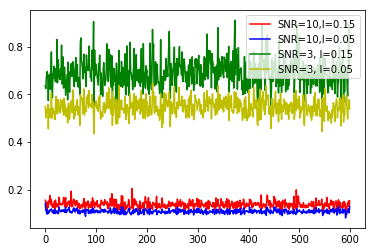

In [9]:
import matplotlib.pyplot as plt 
plt.plot(sum2,color='r',label='SNR=10,l=0.15')
plt.plot(sum1,color='b',label='SNR=10,l=0.05')
plt.plot(sum4,color='g',label='SNR=3, l=0.15')
plt.plot(sum3,color='y',label='SNR=3, l=0.05')
plt.legend()
plt.show()

600
[0.991999   0.50204296 0.25169411]
600
[0.99480308 0.50167715 0.2530418 ]


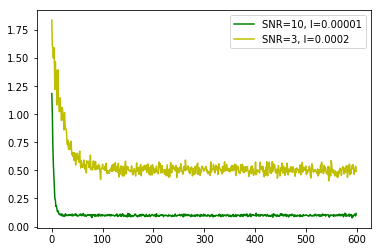

In [40]:
step3=0.00005
step4=0.0003

a5,MSE5=LMS(step3,w,matched_3_v,matched_3_z)
sum5=[]
for i in range(len(MSE5)):
    result=0
    for j in range(len(MSE5[0])):
        result+=MSE5[i][j]
    sum5.append(result/len(MSE5[0]))
print(len(sum5))
print(a5)
a6,MSE6=LMS(step4,w,matched_10_v,matched_10_z)
sum6=[]
for i in range(len(MSE6)):
    result=0
    for j in range(len(MSE6[0])):
        result+=MSE6[i][j]
    sum6.append(result/len(MSE6[0]))
print(len(sum6))
print(a6)
plt.plot(sum6,color='g',label='SNR=10, l=0.00001')
plt.plot(sum5,color='y',label='SNR=3, l=0.0002')
plt.legend()
plt.show()

# Timevarying

In [14]:
def LMS2(step,w,vn,zn,times=1):
    for number in range(times):
        for i in range(len(vn)): 
            w[i]=np.add(w[i],step*(zn[i]-w[i].T@vn[i])*vn[i])
    return w


In [15]:
step5=0.0001
w1=np.zeros((501,3))
print(timevarying_coefficents[0][1])

-0.4999999999999998


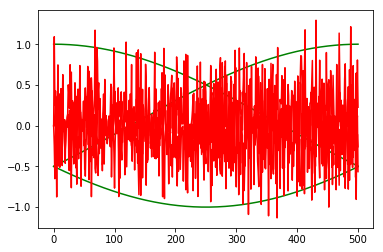

In [16]:
w2=LMS2(step5,w1,timevarying_v,timevarying_z,times=10000)
plt.plot(timevarying_coefficents,color='g')
plt.plot(w2,color='r')
plt.show()

In [17]:
print(timevarying_coefficents)
print(w2)

[[ 1.         -0.5        -0.5       ]
 [ 0.99999126 -0.50361598 -0.49637528]
 [ 0.99996505 -0.50722316 -0.49274189]
 ...
 [-0.48909989 -0.51082147  0.99992136]
 [-0.49274189 -0.50722316  0.99996505]
 [-0.49637528 -0.50361598  0.99999126]]
[[-0.00790916  0.          0.        ]
 [ 1.0917954  -0.24774792  0.        ]
 [ 0.24781659 -0.65136509  0.1478064 ]
 ...
 [ 0.03634895 -0.27570763 -0.04967961]
 [ 0.12197688 -0.10627497  0.80609819]
 [-0.56449552 -0.25934567  0.22596047]]


# Mismatch signal

In [27]:
step6=0.01

In [28]:
w2=np.zeros((600,501,3))

MSE= -1.084246 Times=0
MSE= -1.353491 Times=1
MSE= -1.611853 Times=2
MSE= -1.860229 Times=3
MSE= -2.099402 Times=4
MSE= -2.330062 Times=5
MSE= -2.552820 Times=6
MSE= -2.768222 Times=7
MSE= -2.976756 Times=8
MSE= -3.178862 Times=9
MSE= -3.374935 Times=10
MSE= -3.565336 Times=11
MSE= -3.750393 Times=12
MSE= -3.930404 Times=13
MSE= -4.105643 Times=14
MSE= -4.276362 Times=15
MSE= -4.442792 Times=16
MSE= -4.605147 Times=17
MSE= -4.763625 Times=18
MSE= -4.918409 Times=19
MSE= -5.069670 Times=20
MSE= -5.217566 Times=21
MSE= -5.362246 Times=22
MSE= -5.503846 Times=23
MSE= -5.642497 Times=24
MSE= -5.778320 Times=25
MSE= -5.911429 Times=26
MSE= -6.041930 Times=27
MSE= -6.169924 Times=28
MSE= -6.295507 Times=29
MSE= -6.418766 Times=30
MSE= -6.539788 Times=31
MSE= -6.658651 Times=32
MSE= -6.775432 Times=33
MSE= -6.890202 Times=34
MSE= -7.003030 Times=35
MSE= -7.113979 Times=36
MSE= -7.223112 Times=37
MSE= -7.330487 Times=38
MSE= -7.436159 Times=39
MSE= -7.540182 Times=40
MSE= -7.642605 Times=41
MS

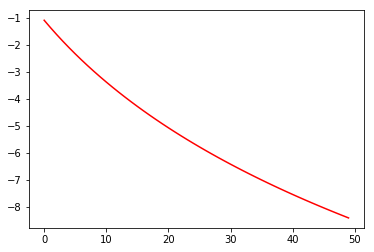

In [29]:
a7,MSE7=LMS(step6,w2,mismatched_v,mismatched_y,times=50)
print(len(MSE7))
print(a7)
plt.plot(MSE7,color='r')
plt.show()